# Install Packages

In [14]:
from roboflow import Roboflow
rf = Roboflow(api_key="nRsx8k1jTup7B0E47mJn")
project = rf.workspace("sgl-project").project("food-detector-smartray")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.57, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Food-detector-Smartray-3 in yolov8:: 100%|██████████| 1050/1050 [00:00<00:00, 5899.71it/s]


In [2]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


# Import Toolkits

In [3]:
from ultralytics import YOLO
import random
import itertools
import os
import numpy as pd
import matplotlib.pyplot as plt
from IPython.display import Image , Video , display
import requests

# Show Sample Data

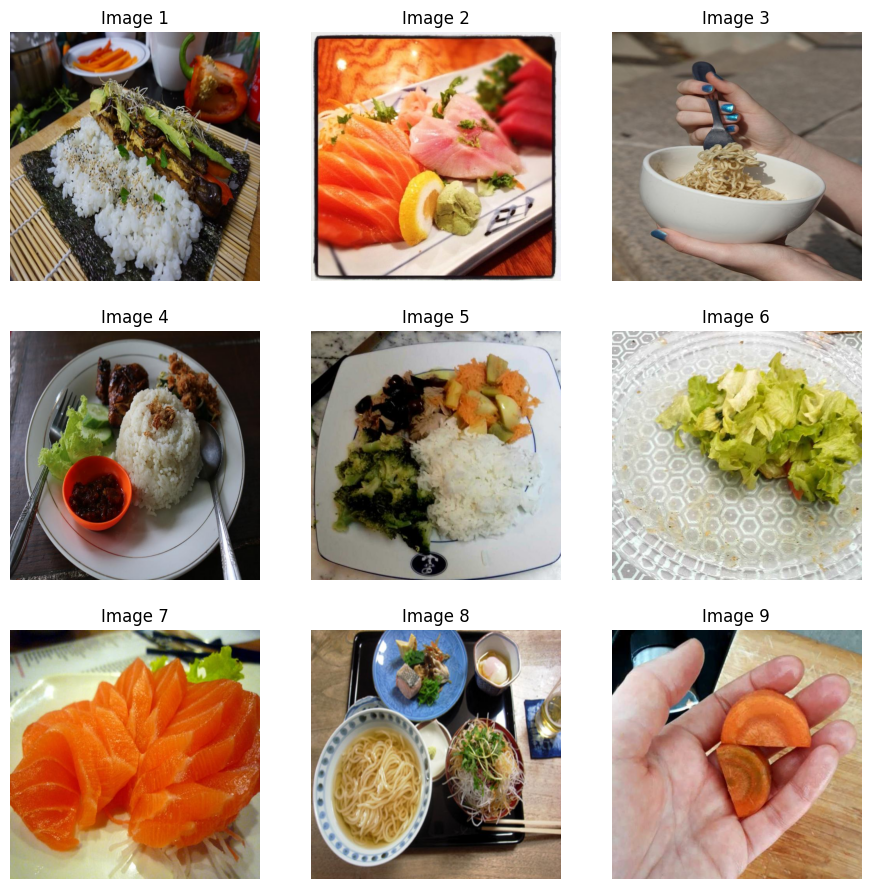

In [15]:
img_dir = "/content/Food-detector-Smartray-3/train/images"
n_samples = 9
img_files = os.listdir(img_dir)
rand_imgs = random.sample(img_files , n_samples)
fig , axes = plt.subplots(3,3, figsize=(11,11))

for i in range(n_samples):
  img = rand_imgs[i]
  ax = axes[i//3 , i%3]
  ax.imshow(plt.imread(os.path.join(img_dir ,img)))
  ax.axis('off')
  ax.set_title(f"Image {i+1}")

plt.tight_layout
plt.show();

# Train Yolov8 on Custom Data

In [16]:
#Load The Model
final_model = YOLO('yolov8s-seg.yaml').load("yolov8s-seg.pt")

#Train The Model
results = final_model.train(data= "/content/Food-detector-Smartray-3/data.yaml" , epochs = 50 , imgsz= 640)

Transferred 417/417 items from pretrained weights
Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/Food-detector-Smartray-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

train: Scanning /content/Food-detector-Smartray-3/train/labels... 364 images, 5 backgrounds, 0 corrupt: 100%|██████████| 364/364 [00:00<00:00, 1515.42it/s]

train: New cache created: /content/Food-detector-Smartray-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Food-detector-Smartray-3/valid/labels... 104 images, 5 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<00:00, 545.40it/s]


val: New cache created: /content/Food-detector-Smartray-3/valid/labels.cache
Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.51G     0.9092      2.686      3.408      1.389         33        640: 100%|██████████| 23/23 [00:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:02<00:00,  1.07it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


                   all        104        101      0.445      0.563       0.48      0.344      0.447      0.551      0.478       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.14G     0.7448      1.502      1.878      1.218         34        640: 100%|██████████| 23/23 [00:13<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]


                   all        104        101      0.535      0.488      0.505      0.335       0.49      0.465      0.483      0.321

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.17G     0.8462      1.501      1.602        1.3         29        640: 100%|██████████| 23/23 [00:12<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]

                   all        104        101      0.463      0.497      0.457      0.226      0.457      0.487      0.441      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.14G     0.9013      1.598      1.536      1.318         35        640: 100%|██████████| 23/23 [00:10<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        104        101       0.38      0.554      0.466       0.28      0.428      0.471      0.457      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.25G     0.8833      1.639      1.497      1.303         39        640: 100%|██████████| 23/23 [00:11<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        104        101      0.437      0.568      0.463      0.247      0.448       0.58      0.451      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.18G     0.8894      1.622      1.428       1.32         31        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        104        101      0.335      0.511      0.437       0.23      0.285      0.478      0.351      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.16G     0.8682      1.581      1.318      1.316         31        640: 100%|██████████| 23/23 [00:11<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        104        101      0.543      0.571      0.573      0.326      0.548      0.573      0.575      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.23G      0.865      1.485      1.256      1.284         39        640: 100%|██████████| 23/23 [00:10<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        104        101      0.529      0.691      0.595      0.378      0.523      0.674      0.587      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.15G       0.81      1.495      1.243      1.236         32        640: 100%|██████████| 23/23 [00:13<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        104        101      0.594      0.662      0.633      0.385      0.595      0.661       0.61      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.18G     0.7951      1.524      1.199      1.247         26        640: 100%|██████████| 23/23 [00:12<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

                   all        104        101      0.765      0.521      0.673      0.444      0.773      0.541       0.63      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.15G     0.7591      1.447       1.14       1.23         33        640: 100%|██████████| 23/23 [00:09<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        104        101      0.667      0.771      0.774      0.508      0.634      0.725      0.723      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.16G     0.7305      1.298      1.077      1.201         30        640: 100%|██████████| 23/23 [00:12<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        104        101      0.626      0.719      0.754      0.519      0.642      0.727      0.755      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.17G     0.7163      1.276      1.039      1.184         31        640: 100%|██████████| 23/23 [00:13<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        104        101      0.536      0.616      0.614      0.449      0.519        0.6      0.597      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.19G      0.748      1.362      1.055      1.205         35        640: 100%|██████████| 23/23 [00:10<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        104        101      0.672      0.588      0.684       0.46      0.683      0.585       0.69      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.15G     0.7109      1.139     0.9374      1.174         32        640: 100%|██████████| 23/23 [00:11<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all        104        101      0.702      0.816      0.828      0.581      0.689      0.846      0.828      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.12G     0.7295      1.358     0.9568      1.208         32        640: 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        104        101      0.602      0.768      0.764      0.564      0.609      0.748      0.763      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.14G     0.6756      1.139     0.9007      1.166         29        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]

                   all        104        101      0.846      0.813      0.883      0.672      0.838      0.802      0.873      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.17G     0.6412      1.166     0.8562      1.129         35        640: 100%|██████████| 23/23 [00:10<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        104        101      0.816      0.822       0.85       0.65      0.817      0.837      0.848       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50       5.2G     0.6821      1.148     0.8807      1.156         37        640: 100%|██████████| 23/23 [00:12<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        104        101      0.834      0.804      0.859      0.679      0.829      0.796      0.846      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.19G     0.6316      1.083     0.8684      1.149         39        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        104        101      0.859      0.819      0.873      0.678      0.879      0.817      0.871      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.17G     0.6272      1.087      0.825      1.118         31        640: 100%|██████████| 23/23 [00:11<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        104        101      0.803      0.745       0.84      0.654      0.794      0.738      0.832      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.15G     0.6108      1.072      0.812      1.123         42        640: 100%|██████████| 23/23 [00:09<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        104        101      0.881      0.729      0.877      0.633      0.881      0.729       0.85      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.15G     0.6191     0.9844     0.8163      1.124         30        640: 100%|██████████| 23/23 [00:13<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        104        101      0.901       0.84      0.922        0.7      0.882       0.83      0.896      0.725



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.16G     0.6339      1.053     0.8713      1.134         35        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        104        101      0.827      0.599      0.725      0.555      0.768      0.571       0.68      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.13G     0.5858      1.038     0.8008      1.089         28        640: 100%|██████████| 23/23 [00:10<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        104        101      0.846      0.812      0.859       0.65      0.826      0.788      0.848      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.17G     0.5809     0.9961     0.7628      1.092         31        640: 100%|██████████| 23/23 [00:10<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        104        101      0.772      0.767      0.844      0.649      0.766      0.759      0.821      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50       5.2G     0.5794     0.9707      0.716      1.097         29        640: 100%|██████████| 23/23 [00:14<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        104        101      0.831       0.87      0.916        0.7      0.831       0.87       0.91      0.747



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.21G     0.5523     0.9044     0.7087      1.075         25        640: 100%|██████████| 23/23 [00:11<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        104        101      0.662      0.867      0.849      0.643       0.71      0.846      0.856      0.718



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.16G     0.5265     0.9061     0.6498       1.05         30        640: 100%|██████████| 23/23 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        104        101      0.745      0.845      0.879      0.704      0.745      0.845      0.872      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.17G     0.5145     0.8596      0.625      1.067         25        640: 100%|██████████| 23/23 [00:12<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all        104        101      0.823      0.775      0.842      0.701      0.865      0.752      0.842      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.19G     0.5304     0.8764     0.6213      1.072         30        640: 100%|██████████| 23/23 [00:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        104        101      0.883      0.822       0.89      0.735      0.907      0.816      0.883       0.76



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.15G     0.5162     0.8531       0.65      1.064         34        640: 100%|██████████| 23/23 [00:11<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        104        101      0.862      0.853      0.887      0.734      0.854      0.846      0.875      0.754



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.14G     0.5017     0.8379     0.6144      1.031         35        640: 100%|██████████| 23/23 [00:09<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        104        101      0.818      0.855      0.871       0.73       0.81      0.847      0.863      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.17G     0.4973      0.867     0.6277      1.045         27        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        104        101      0.832      0.809      0.871      0.697      0.762      0.847      0.858      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.15G      0.481     0.8201     0.5887      1.034         29        640: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        104        101      0.905      0.811      0.885      0.747      0.898      0.803      0.876      0.766



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.16G     0.4811     0.7843     0.5966      1.044         35        640: 100%|██████████| 23/23 [00:10<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        104        101      0.897      0.847      0.908      0.756      0.886      0.854      0.899      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.19G     0.4649     0.7674     0.5705      1.016         25        640: 100%|██████████| 23/23 [00:10<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]


                   all        104        101      0.864      0.806      0.884      0.737      0.864      0.806      0.874      0.775

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.15G     0.4546      0.767      0.545      1.023         29        640: 100%|██████████| 23/23 [00:12<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        104        101      0.866      0.844      0.887      0.731      0.866      0.844      0.878      0.741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.17G     0.4477     0.7162     0.5382      1.012         38        640: 100%|██████████| 23/23 [00:12<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        104        101      0.878      0.809      0.872      0.707      0.878      0.809      0.866       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.18G     0.4603     0.7741     0.5562      1.027         39        640: 100%|██████████| 23/23 [00:10<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        104        101       0.94       0.75      0.872      0.727       0.94       0.75      0.864       0.76


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.07G     0.3889     0.7074     0.5258      1.027         15        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        104        101      0.792      0.871      0.889      0.705      0.799      0.856      0.876       0.77



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.17G     0.4179     0.6899     0.5028      1.072         12        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        104        101      0.867      0.839      0.882      0.734       0.86      0.831      0.871       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.09G     0.3556     0.5862     0.4368     0.9932         12        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

                   all        104        101      0.829      0.892      0.901      0.748      0.823      0.884      0.891      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50       5.1G     0.3445     0.5684     0.4211      1.003         23        640: 100%|██████████| 23/23 [00:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        104        101      0.858      0.903      0.902      0.755      0.851      0.895      0.887       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.08G     0.3436      0.553     0.3825     0.9812         17        640: 100%|██████████| 23/23 [00:11<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        104        101      0.904      0.814      0.905      0.766      0.905      0.809      0.892      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.09G     0.3193      0.538     0.3492     0.9803         16        640: 100%|██████████| 23/23 [00:11<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        104        101      0.898      0.826      0.898      0.759      0.891      0.818      0.887      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.14G     0.3138     0.5023     0.3738     0.9482         13        640: 100%|██████████| 23/23 [00:09<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        104        101      0.872      0.877      0.903      0.777      0.865      0.869      0.891      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       5.1G     0.3096     0.4778     0.3237     0.9583         13        640: 100%|██████████| 23/23 [00:11<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        104        101      0.874      0.889        0.9       0.78      0.867      0.881      0.887      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.08G     0.2927     0.4738     0.3209     0.9504         12        640: 100%|██████████| 23/23 [00:11<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        104        101      0.876      0.872      0.906      0.776      0.869      0.864      0.892      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.09G     0.2937     0.4793     0.3198     0.9387         12        640: 100%|██████████| 23/23 [00:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        104        101      0.847      0.886      0.898      0.784       0.84      0.878      0.886      0.793



50 epochs completed in 0.223 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 23.9MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,781,535 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


                   all        104        101      0.846      0.886      0.898      0.783       0.84      0.878      0.886      0.793
               carotte         20         20      0.778      0.526      0.731      0.521      0.778      0.527      0.713      0.572
                laitue         16         16      0.885          1      0.995       0.93      0.884          1      0.995      0.899
              nouilles         24         25      0.796       0.96      0.863      0.749      0.763       0.92      0.821      0.689
             riz blanc         19         19      0.942          1      0.995      0.922      0.941          1      0.995      0.924
                saumon         21         21      0.832      0.944      0.907      0.796      0.832      0.944      0.907      0.882
Speed: 0.6ms preprocess, 7.0ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/segment/train2


## Display The Image


image 1/1 /content/Food-detector-Smartray-3/valid/images/008017_jpg.rf.afbdf7b0ca41920f14240523398bf74f.jpg: 640x640 1 laitue, 22.5ms
Speed: 2.1ms preprocess, 22.5ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)


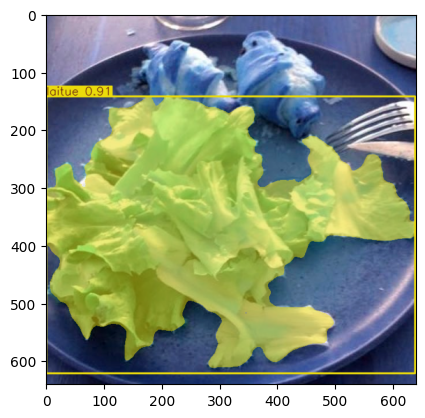

In [17]:
model = YOLO("/content/runs/segment/train2/weights/best.pt")
history = model.predict("/content/Food-detector-Smartray-3/valid/images/008017_jpg.rf.afbdf7b0ca41920f14240523398bf74f.jpg")[0]
image = history.plot()
plt.imshow(image)
plt.show()

# Let`s Build The Graph

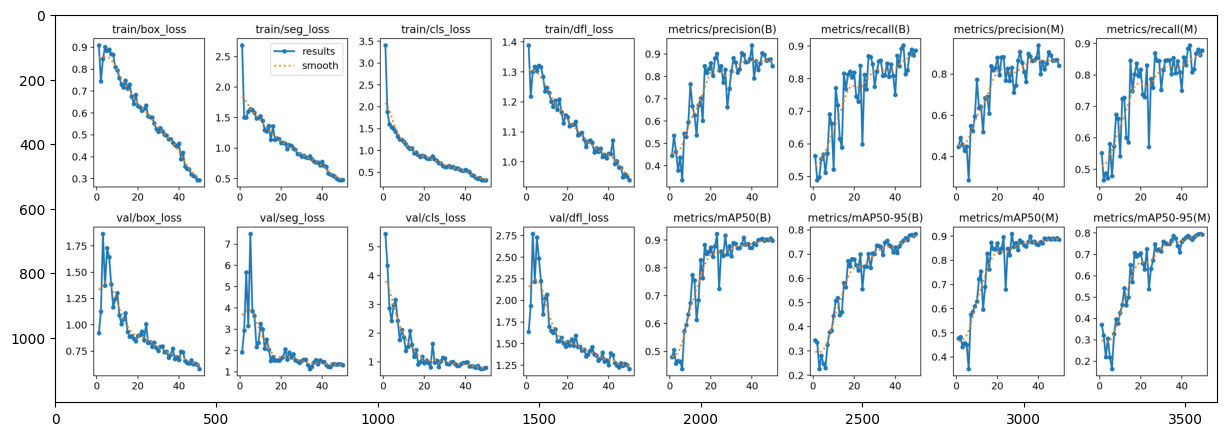

In [18]:
from PIL import Image
F1_curve = Image.open("/content/runs/segment/train2/results.png")
plt.figure(figsize= (15,20))
plt.imshow(F1_curve)
plt.show();

# Train Batch

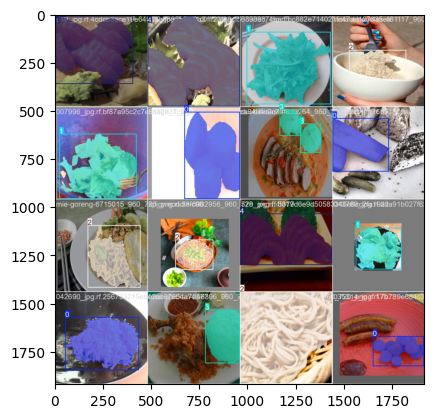

In [19]:
P_curve = Image.open("/content/runs/segment/train2/train_batch922.jpg")
plt.imshow(P_curve)
plt.show();